# **University Admit Eligibility Predictor**

### **Description:**

*Students are often worried about their chances of admission to University. The aim of this project is to help students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their admission chances in a particular university. This analysis should also help students who are currently preparing or will be preparing to get a better idea.*


## **Download and Load Dataset**

In [179]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='829d8AB1GubKk6iuUcNTaxATY7JnFW0MlcpTrGkS31F5',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'universityadmiteligibilitypredict-donotdelete-pr-hztkdvzf5q8pgs'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as rcParams

In [181]:
df = df.rename(columns = {'GRE Score': 'GRE','TOEFL Score': 'TOEFL','University Rating': 'University_Rating','LOR ':'LOR',
                          'Chance of Admit ':'Admit_Chance'})
df.head()

,Serial No.,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Admit_Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [182]:
df = df.drop(columns=['Serial No.'],axis=1)
df.head()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Admit_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [183]:
df.shape

(400, 8)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE                400 non-null    int64  
 1   TOEFL              400 non-null    int64  
 2   University_Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Admit_Chance       400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [185]:
df.University_Rating.unique()

array([4, 3, 2, 5, 1])

In [186]:
df.SOP.unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [187]:
df.LOR.unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [188]:
df.Research.value_counts()

1    219
0    181
Name: Research, dtype: int64

In [189]:
df.University_Rating.value_counts()

3    133
2    107
4     74
5     60
1     26
Name: University_Rating, dtype: int64

## **Visualizations** 

 **Univariate Analysis**

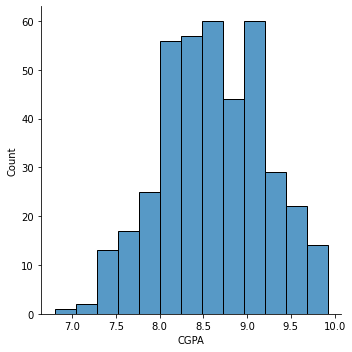

In [190]:
sns.displot(df.CGPA)

([<matplotlib.patches.Wedge at 0x7f177ce3d7f0>,
 [Text(-0.1635397261721476, 1.087775141269343, ''),
  Text(0.1932742218398109, -1.2855524396819509, '')],
 [Text(-0.08920348700298959, 0.5933318952378234, '154.8%'),
  Text(0.11893798267065285, -0.7911091936504312, '145.2%')])

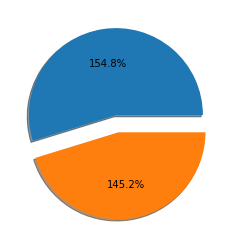

In [191]:
plt.pie(df.Research.value_counts(),[0,0.2],shadow='True',autopct="1%.1f%%")   #categorial column

<AxesSubplot:xlabel='University_Rating', ylabel='Density'>

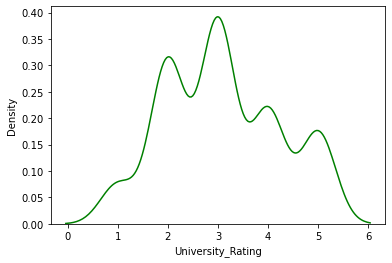

In [192]:
sns.kdeplot(df.University_Rating,color="Green")

Text(0.5, 1.0, 'GRE Score')

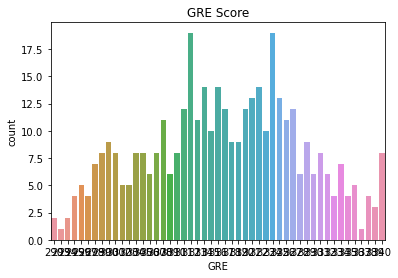

In [193]:
sns.countplot(df.GRE)
plt.title('GRE Score')

**Bi-variate Analysis**

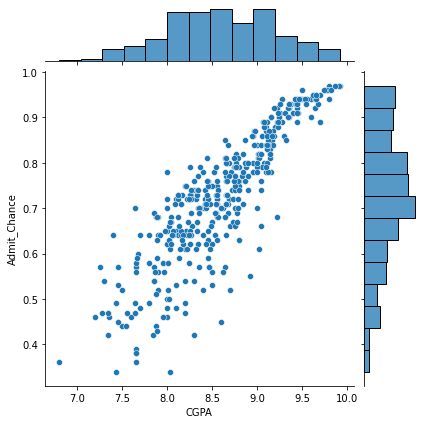

In [194]:
sns.jointplot(df.CGPA,df.Admit_Chance)

<AxesSubplot:xlabel='GRE', ylabel='Admit_Chance'>

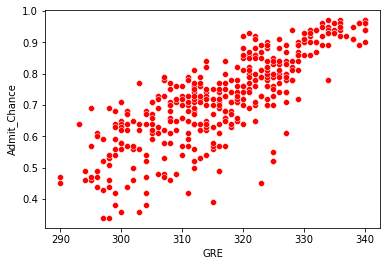

In [195]:
sns.scatterplot(df.GRE,df.Admit_Chance,color="Red")

<AxesSubplot:xlabel='SOP', ylabel='LOR'>

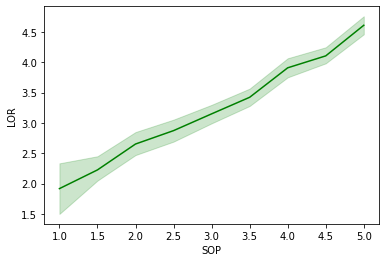

In [196]:
sns.lineplot(df.SOP,df.LOR,color='Green')

<BarContainer object of 400 artists>

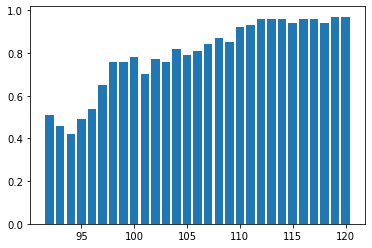

In [197]:
plt.bar(df.TOEFL,df.Admit_Chance)

**Multi-variate Analysis**

array([[<AxesSubplot:title={'center':'GRE'}>,
        <AxesSubplot:title={'center':'TOEFL'}>,
        <AxesSubplot:title={'center':'University_Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR'}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Admit_Chance'}>, <AxesSubplot:>]],
      dtype=object)

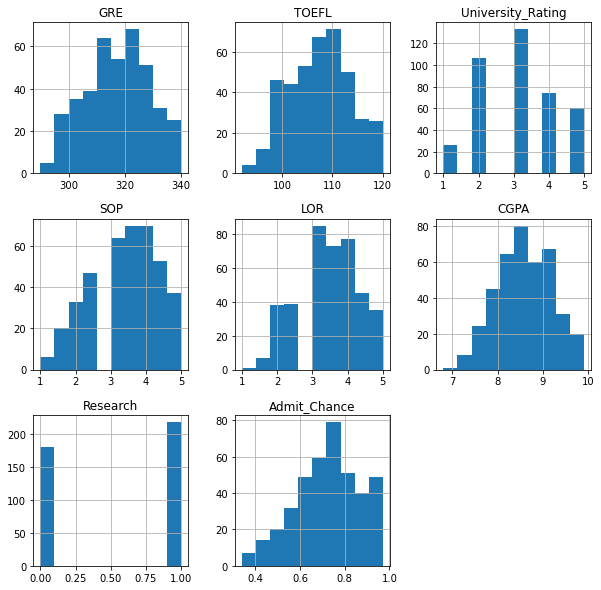

In [198]:
df.hist(figsize=(10,10))

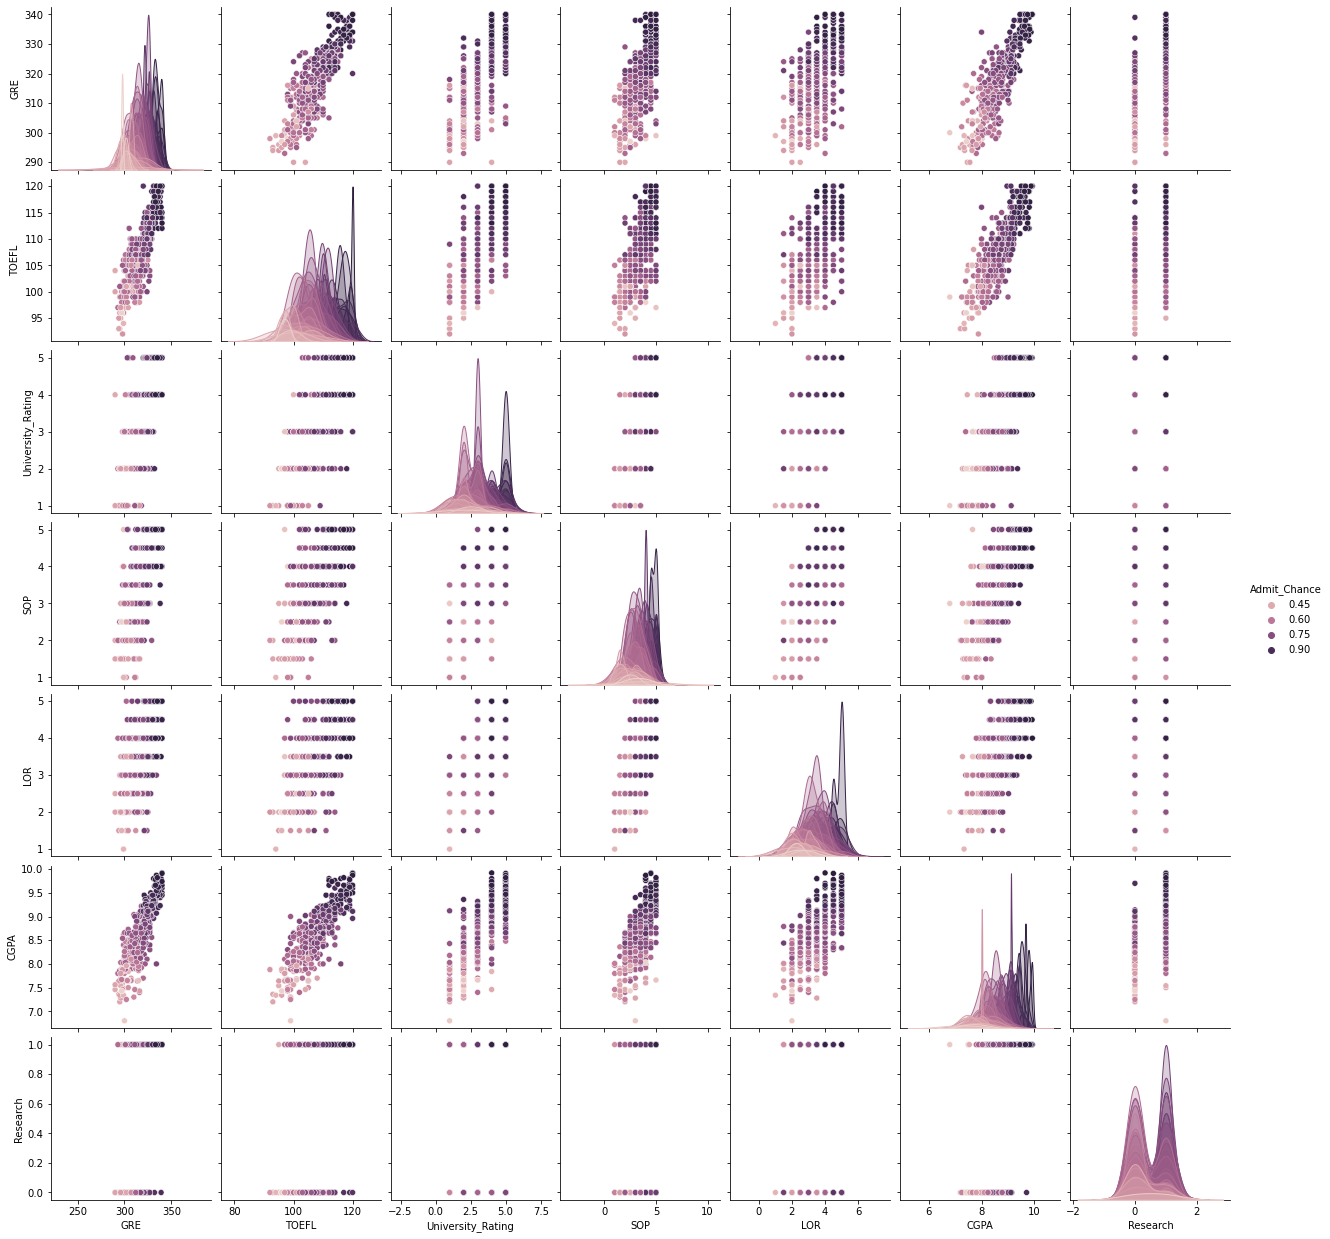

In [199]:
sns.pairplot(df,hue='Admit_Chance',diag_kind='kde')

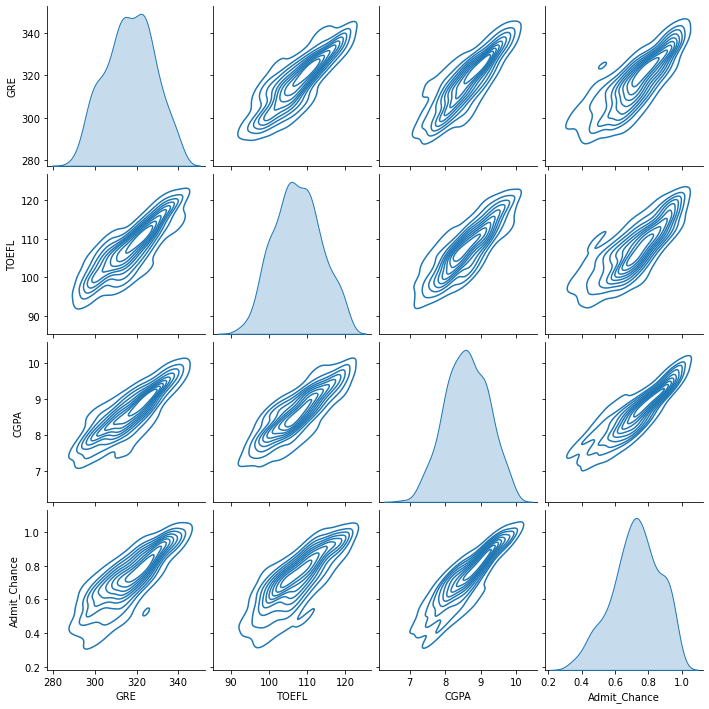

In [200]:
sns.pairplot(data=df[['GRE','TOEFL','CGPA','Admit_Chance']],kind='kde')

## **Descriptive statistics**

In [201]:
df.describe()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Admit_Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## **Handle missing data**

In [202]:
df.isnull().any() #There is no missing data in this dataset

GRE                  False
TOEFL                False
University_Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Admit_Chance         False
dtype: bool

## **Outliers Replacement**

<AxesSubplot:xlabel='GRE'>

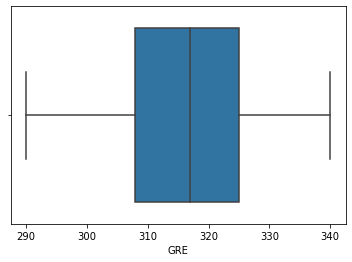

In [203]:
sns.boxplot(df.GRE)   #This datset has no outliers

## **Correlation**


In [204]:
df.corr()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research,Admit_Chance
GRE,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University_Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Admit_Chance,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

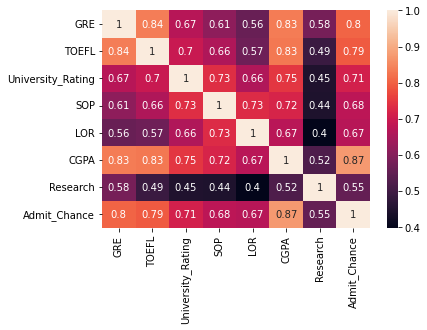

In [205]:
sns.heatmap(df.corr(),annot=True)

In [206]:
df.corr().Admit_Chance.sort_values(ascending=False)

Admit_Chance         1.000000
CGPA                 0.873289
GRE                  0.802610
TOEFL                0.791594
University_Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Admit_Chance, dtype: float64

## **Split the data into dependent and independent variables**

In [207]:
#y - target columns
#X - predicting columns

In [208]:
y=df['Admit_Chance']
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Admit_Chance, Length: 400, dtype: float64

In [209]:
X=df.drop(columns=['Admit_Chance'],axis=1)
X.head()

,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [242]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE                400 non-null    int64  
 1   TOEFL              400 non-null    int64  
 2   University_Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 22.0 KB


## **Scale the independent variables**



In [210]:
from sklearn.preprocessing import scale



In [211]:
df2=pd.DataFrame(scale(X),columns=X.columns)
df2.head()



,GRE,TOEFL,University_Rating,SOP,LOR,CGPA,Research
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


## **Split the data into training and testing**


In [212]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df2,y,test_size=0.3,random_state=22)

In [213]:
X_train.shape,X_test.shape

((280, 7), (120, 7))

In [214]:
y_train.shape,y_test.shape

((280,), (120,))

## **Build the model**

In [215]:
from sklearn.linear_model import Ridge
model=Ridge()                                 #Ridge Regression Model

## **Train the model**

In [216]:
model.fit(X_train,y_train) 

Ridge()

In [217]:
pred_train=model.predict(X_train)
pred_train

array([0.56296858, 0.6920868 , 0.77674141, 0.66000694, 0.70837081,
       0.70338462, 0.82707744, 0.59395938, 0.74206499, 0.80681832,
       0.63811886, 0.59028689, 0.84148345, 0.88149031, 0.81667723,
       0.79942777, 0.93160977, 0.90297518, 0.85647444, 0.86044951,
       0.74001248, 0.65066547, 0.75889679, 0.61042888, 0.82685483,
       0.70258391, 0.70718717, 0.63407806, 0.46142487, 0.61700005,
       0.61448274, 0.68345365, 0.63099442, 0.80701299, 0.88602039,
       0.95678402, 0.98534485, 0.61282839, 0.80272755, 0.89417096,
       0.85556749, 0.62106094, 0.85832548, 0.67070327, 0.69692301,
       0.74317416, 0.52228772, 0.50403163, 0.67831162, 0.80479224,
       0.72431662, 0.67284232, 0.95355773, 0.62442355, 0.82326041,
       0.61248613, 0.70925707, 0.77977534, 0.57722488, 0.70810437,
       0.93499648, 0.62736962, 0.96615696, 0.78275204, 0.52009696,
       0.52073811, 0.64858449, 0.83927039, 0.73003668, 0.79466094,
       0.79495688, 0.79254935, 0.73241666, 0.66964193, 0.59084

## **Test the model**

In [218]:
y_test

261    0.71
393    0.77
378    0.56
185    0.89
202    0.97
       ... 
22     0.94
336    0.72
331    0.73
131    0.77
346    0.47
Name: Admit_Chance, Length: 120, dtype: float64

In [219]:
pred=model.predict(X_test)
pred                  

array([0.6498868 , 0.6875929 , 0.51802062, 0.85462546, 0.99181933,
       0.68723519, 0.52035944, 0.90295484, 0.61262987, 0.70373371,
       0.80092093, 0.81877952, 0.84705293, 0.52193536, 0.79318937,
       0.89703607, 0.457456  , 0.59235463, 0.78447051, 0.85236045,
       0.64316574, 0.63608968, 0.53394796, 0.76931663, 0.79984914,
       0.64443492, 0.58589349, 0.7904995 , 0.83764361, 0.88983992,
       0.78286486, 0.65313711, 0.67456296, 0.94907986, 0.78264756,
       0.91780528, 0.49063771, 0.89206105, 0.65190261, 0.74011579,
       0.81019276, 0.8332754 , 0.5054454 , 0.73112814, 0.60896145,
       0.65217559, 0.64597181, 0.65168616, 0.70783782, 0.54363658,
       0.75908467, 0.76009165, 0.79412436, 0.57923022, 0.52492141,
       0.69215707, 0.59256474, 0.70180828, 0.57642119, 0.72130374,
       0.58308524, 0.80639982, 0.59053324, 0.63393213, 0.49624247,
       0.85398597, 0.82776874, 0.80673102, 0.69804132, 0.67773886,
       0.65178333, 0.55922745, 0.85465867, 0.78196742, 0.79430

In [220]:
admit_chance_pred = pd.DataFrame({'Actual_value':y_test,'Predicted_value_using_r':pred})
admit_chance_pred.head()

,Actual_value,Predicted_value_using_r
261,0.71,0.649887
393,0.77,0.687593
378,0.56,0.518021
185,0.89,0.854625
202,0.97,0.991819


## **Measure the performance using metrics**


In [221]:
from sklearn import metrics

In [222]:
# R2-square for Testing Accuracy
print(metrics.r2_score(y_test,pred))

0.7953606119569931


In [223]:
# R2-square for Training Accuracy
print(metrics.r2_score(y_train,pred_train))

0.7990613219487214


In [224]:
# MSE(Mean square error)
print(metrics.mean_squared_error(y_test,pred))

0.004034073309774132


In [225]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

0.06351435514727463


# IBM Deployment

In [226]:
!pip install -U ibm-watson-machine-learning

In [227]:
from ibm_watson_machine_learning import APIClient
import json

# Authenticate and Set Space

In [228]:
wml_credentials = {
    "apikey":"JyhzzPTqYb5vdnL-g25mEurwEUgEHsrht4XjZo6UvyUm",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [229]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------------------------------  ------------------------
ID                                    NAME                                    CREATED
7d128877-9b28-42a2-9e7e-f7d5d3a1cec0  University_Admit_Eligibility_Predictor  2022-11-06T09:52:14.835Z
1935aa44-c73a-4c95-8a65-ace9ec69ed28  insurance                               2022-10-23T15:38:41.254Z
00adce0c-5852-4796-8481-d8299087cc51  university_predictor                    2022-10-17T16:15:26.454Z
------------------------------------  --------------------------------------  ------------------------


In [230]:
SPACE_ID= "7d128877-9b28-42a2-9e7e-f7d5d3a1cec0"

In [231]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [232]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

# Save and Deploy the Model

In [233]:
import sklearn
sklearn.__version__

'1.0.2'

In [234]:
MODEL_NAME = 'admit_predictor'
DEPLOYMENT_NAME = 'admit_predictor_new'
DEMO_MODEL = model

In [235]:
# Set Python Version  
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [236]:
# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [238]:
#Save model
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [239]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Admit_Chance',
  'schemas': {'input': [{'fields': [{'name': 'GRE', 'type': 'float64'},
      {'name': 'TOEFL', 'type': 'float64'},
      {'name': 'University_Rating', 'type': 'float64'},
      {'name': 'SOP', 'type': 'float64'},
      {'name': 'LOR', 'type': 'float64'},
      {'name': 'CGPA', 'type': 'float64'},
      {'name': 'Research', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-06T10:33:08.661Z',
  'id': '23ef34da-976f-43f8-9ddd-49f6ca9b93e1',
  'modified_at': '2022-11-06T10:33:11.352Z',
  'name': 'admit_predictor',
  'owner': 'IBMid-668000BZAP',
  'resource_key': 'cf98bc23-2286-47e0-ab3c-a8459b3bec6d',
  'space_id': '7d128877-9b28-42a2-9e7e-f7d5d3a1cec0'},
 'system': {'warnings': []}}

In [312]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'00b4b6f6-3bf7-49a2-a66f-c8dded4eaa9c'

In [313]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [314]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_id, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: '00b4b6f6-3bf7-49a2-a66f-c8dded4eaa9c' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='0bfdeda4-f2a5-45c8-9262-ad4eb310e85f'
------------------------------------------------------------------------------------------------


